In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("novagen_dataset.csv")
data.head()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,...,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type__Vegan,Diet_Type__Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
0,2.0,26.0,111.0,198.0,99.0,72.0,4.0,1.0,5.0,5.0,...,1,2,1,0,1,False,True,True,False,False
1,8.0,24.0,121.0,199.0,103.0,75.0,2.0,1.0,2.0,9.0,...,1,2,1,2,2,False,False,True,False,False
2,81.0,27.0,147.0,203.0,100.0,74.0,10.0,-0.0,5.0,1.0,...,2,0,0,1,0,True,False,False,False,False
3,25.0,21.0,150.0,199.0,102.0,70.0,7.0,3.0,3.0,3.0,...,1,2,1,2,0,True,False,False,True,False
4,24.0,26.0,146.0,202.0,99.0,76.0,10.0,2.0,5.0,1.0,...,2,0,2,0,2,False,True,False,True,False


In [3]:
# Analyzing data
data.isnull().sum()
data.duplicated().sum()
data.shape

(9549, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    9549 non-null   float64
 1   BMI                    9549 non-null   float64
 2   Blood_Pressure         9549 non-null   float64
 3   Cholesterol            9549 non-null   float64
 4   Glucose_Level          9549 non-null   float64
 5   Heart_Rate             9549 non-null   float64
 6   Sleep_Hours            9549 non-null   float64
 7   Exercise_Hours         9549 non-null   float64
 8   Water_Intake           9549 non-null   float64
 9   Stress_Level           9549 non-null   float64
 10  Target                 9549 non-null   int64  
 11  Smoking                9549 non-null   int64  
 12  Alcohol                9549 non-null   int64  
 13  Diet                   9549 non-null   int64  
 14  MentalHealth           9549 non-null   int64  
 15  Phys

In [5]:
data.describe()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,Target,Smoking,Alcohol,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies
count,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000
mean,33.806786,25.660697,130.382658,199.091528,100.225678,73.613782,6.951409,1.892345,3.580899,4.382134,0.521416,0.990470,0.995183,1.005864,0.998429,1.003351,1.004713,0.989318
std,24.566473,1.942369,27.878476,1.969234,2.157999,1.681538,2.352152,1.378714,1.622874,2.078593,0.499567,0.815521,0.816653,0.815877,0.821844,0.808800,0.813506,0.815699
min,0.000000,19.000000,22.000000,192.000000,93.000000,67.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,24.000000,113.000000,198.000000,99.000000,73.000000,5.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,26.000000,134.000000,199.000000,100.000000,74.000000,7.000000,2.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,50.000000,27.000000,150.000000,200.000000,102.000000,75.000000,9.000000,3.000000,5.000000,6.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,100.000000,32.000000,225.000000,207.000000,107.000000,80.000000,14.000000,8.000000,10.000000,12.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# Exploratory Data Analysis


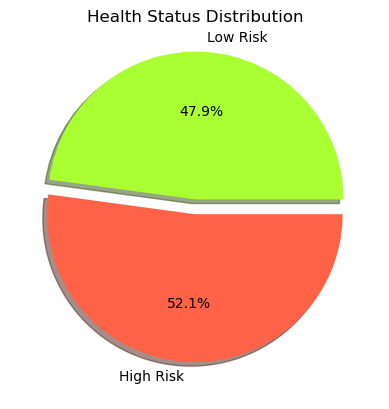

In [6]:
# Analyzing Balanced Classes (Health/Risk Outcome 0 -> Low Risk, 1-> High Risk)

target_counts = data['Target'].value_counts().sort_index()

# Explicit label mapping
label_map = {
    0: 'Low Risk',
    1: 'High Risk'
}

labels = [label_map[i] for i in target_counts.index]
explode = [0.1,0]

plt.pie(
    target_counts,
    labels = labels,
    autopct = '%1.1f%%',
    explode = explode,
    colors = ['#AAFF32', '#FF6347'],
    shadow = True
)
plt.title('Health Status Distribution')
plt.show()


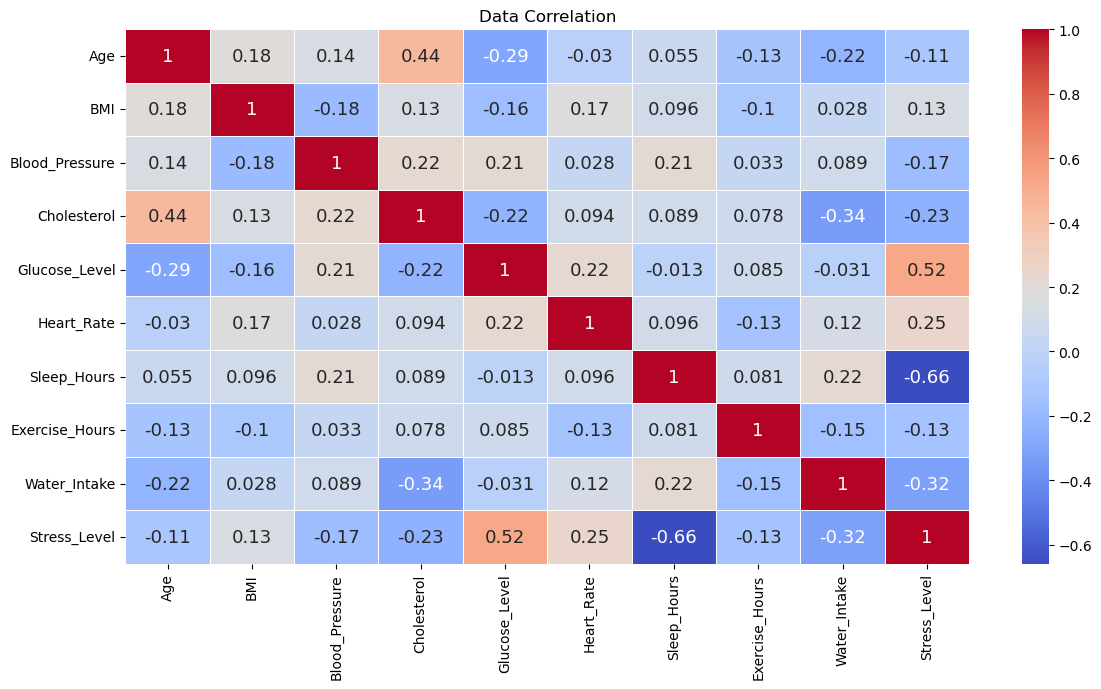

In [7]:
# Co-relation Heatmap
plt.figure(figsize=(12,7))
num_cols = [
    'Age', 'BMI', 'Blood_Pressure', 'Cholesterol',
    'Glucose_Level', 'Heart_Rate', 'Sleep_Hours',
    'Exercise_Hours', 'Water_Intake', 'Stress_Level'
]
sns.heatmap(data[num_cols].corr(), linewidth= .5, annot=True, cmap='coolwarm',  annot_kws={'size': 13} )
plt.title("Data Correlation")
plt.tight_layout()

<Axes: >

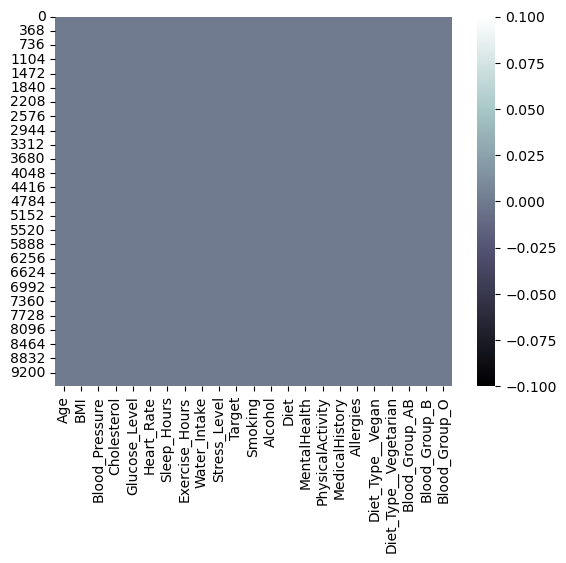

In [8]:
sns.heatmap(data.isnull(), cmap='bone')

# No Null Values

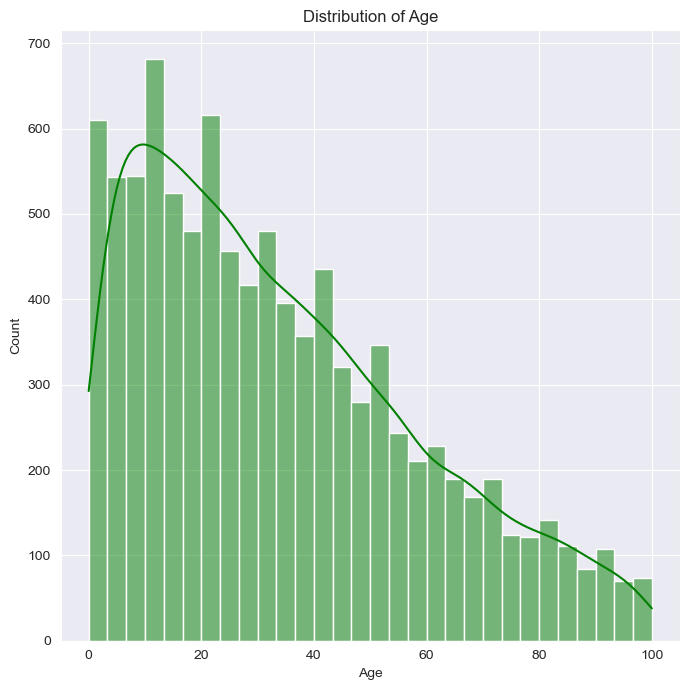

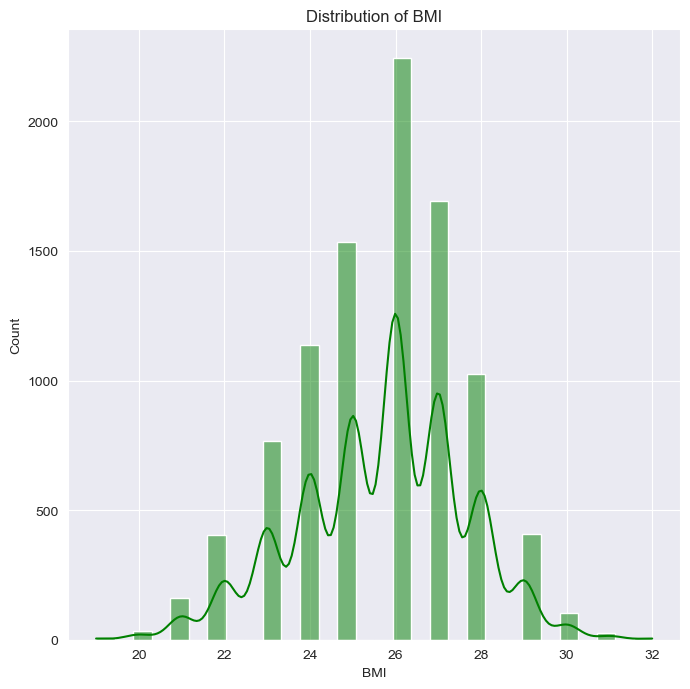

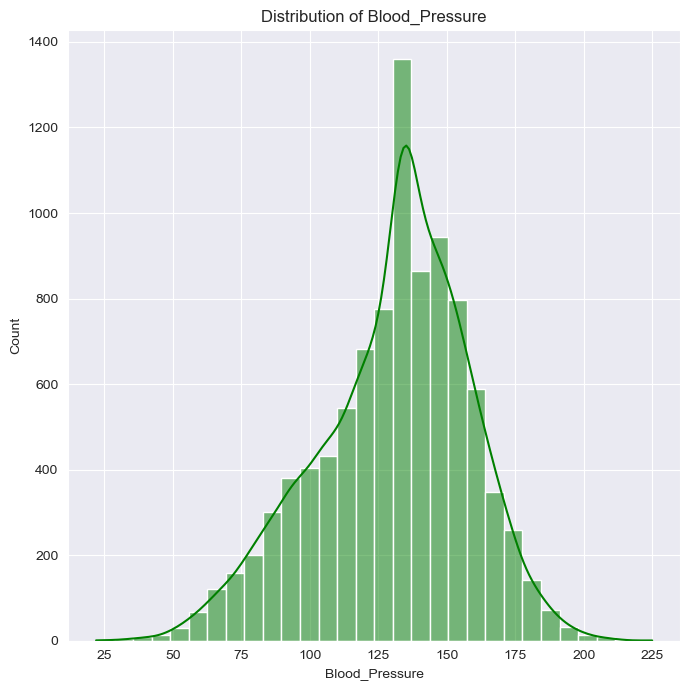

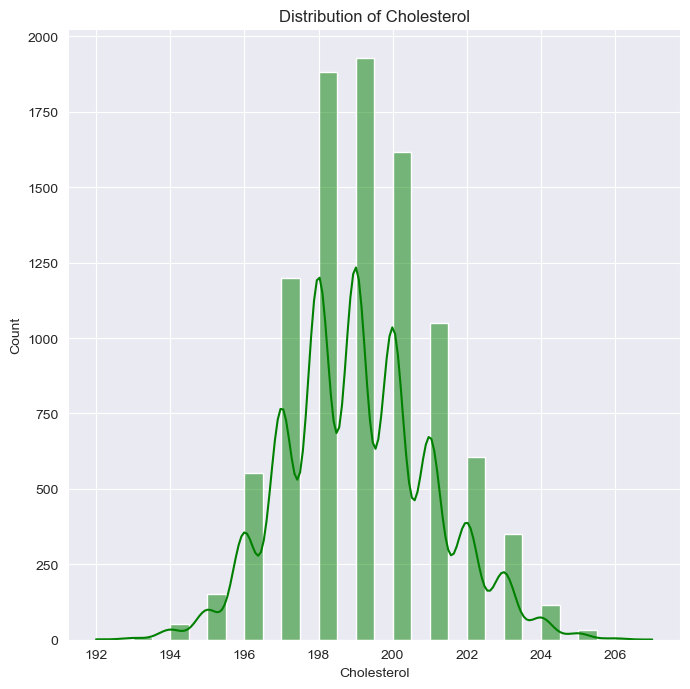

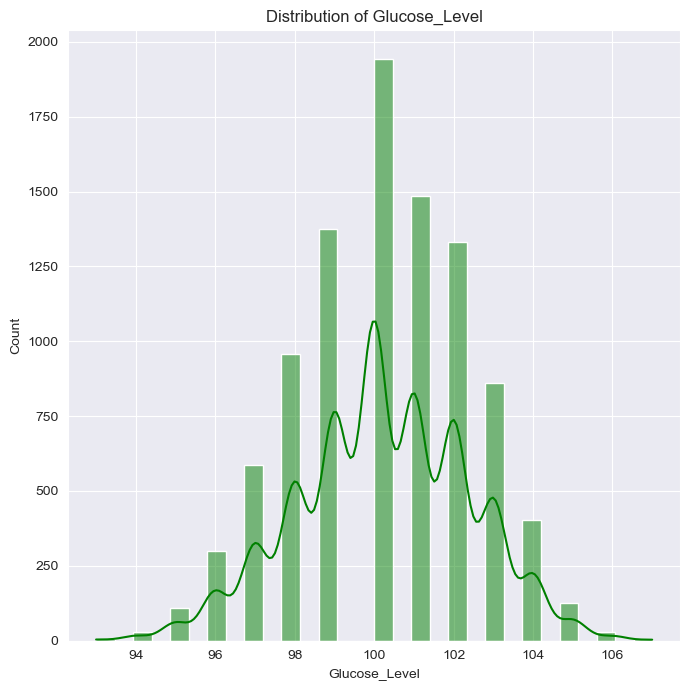

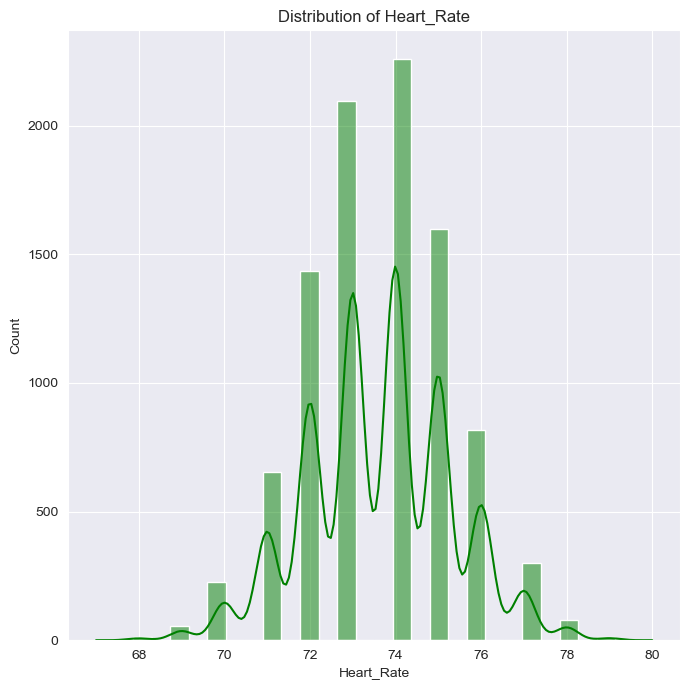

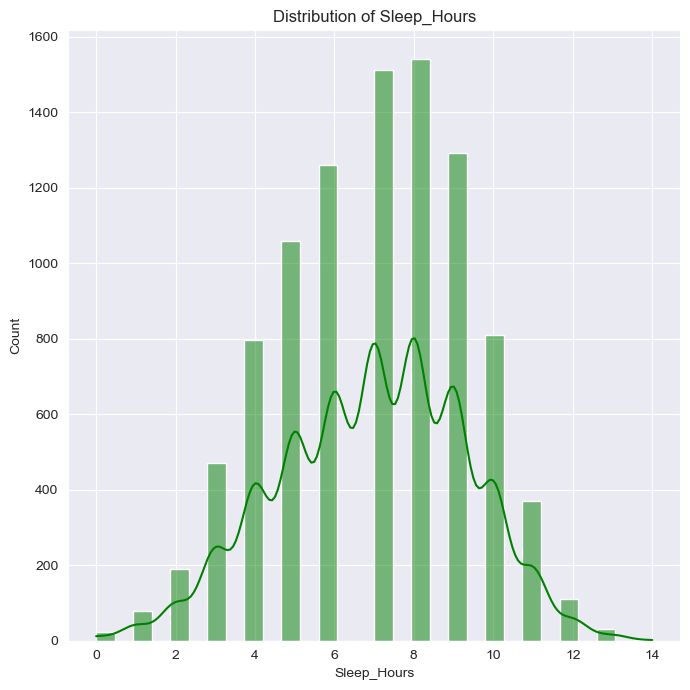

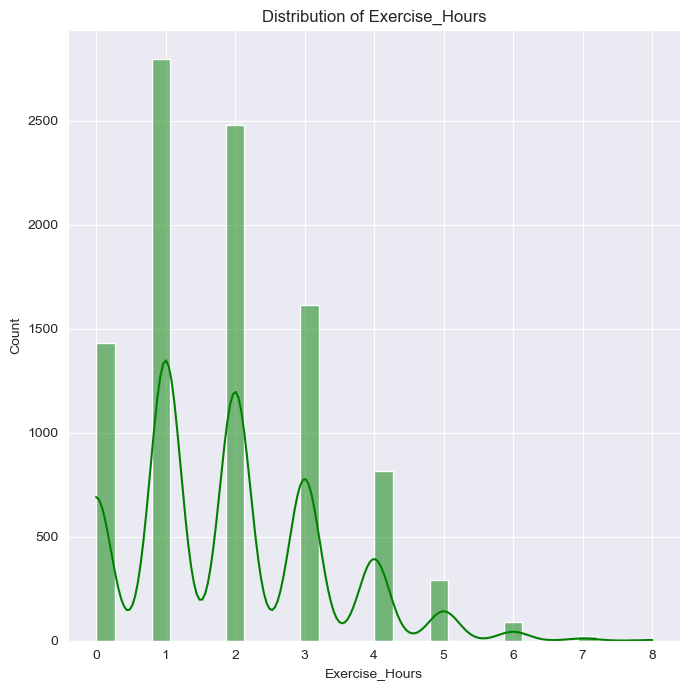

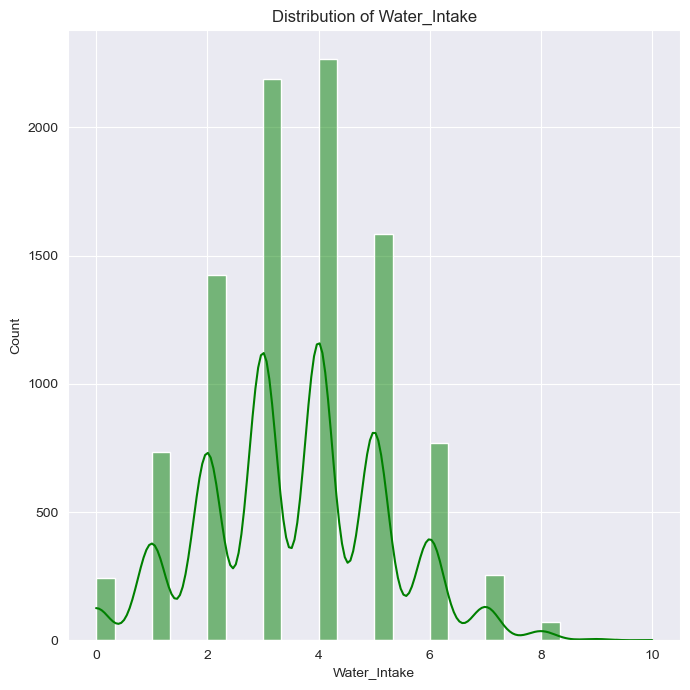

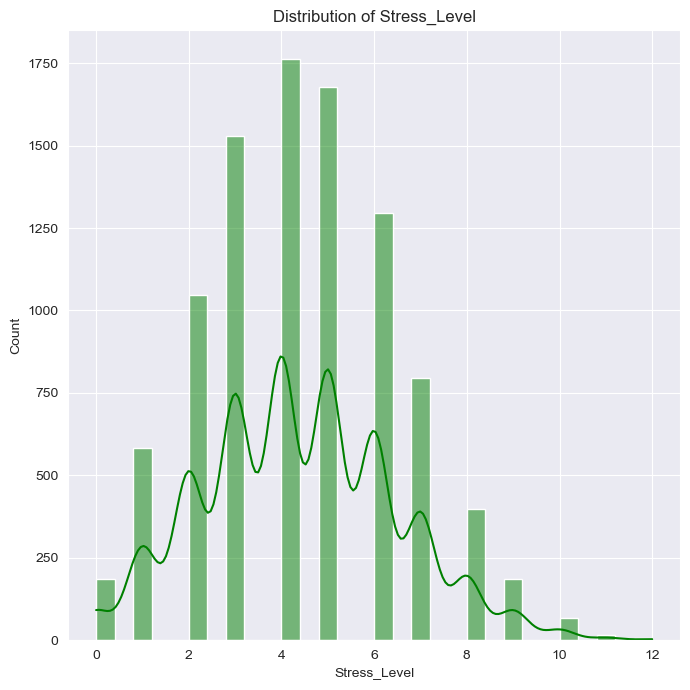

In [9]:
# Continuous Numeric Features Distribution
sns.set_style("darkgrid")

num_cols = [
    'Age', 'BMI', 'Blood_Pressure', 'Cholesterol',
    'Glucose_Level', 'Heart_Rate', 'Sleep_Hours',
    'Exercise_Hours', 'Water_Intake', 'Stress_Level'
]

for cols in num_cols:
    plt.figure(figsize=(7, 7)),
    sns.histplot(data[cols], kde=True, bins=30, color= "green"),
    plt.title(f"Distribution of {cols}"),
    plt.grid(True),
    plt.tight_layout(),
    plt.show()
              

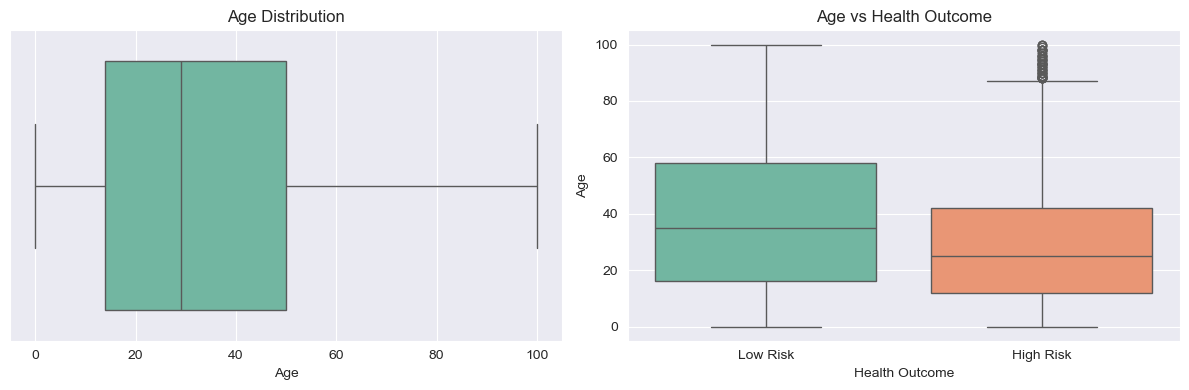

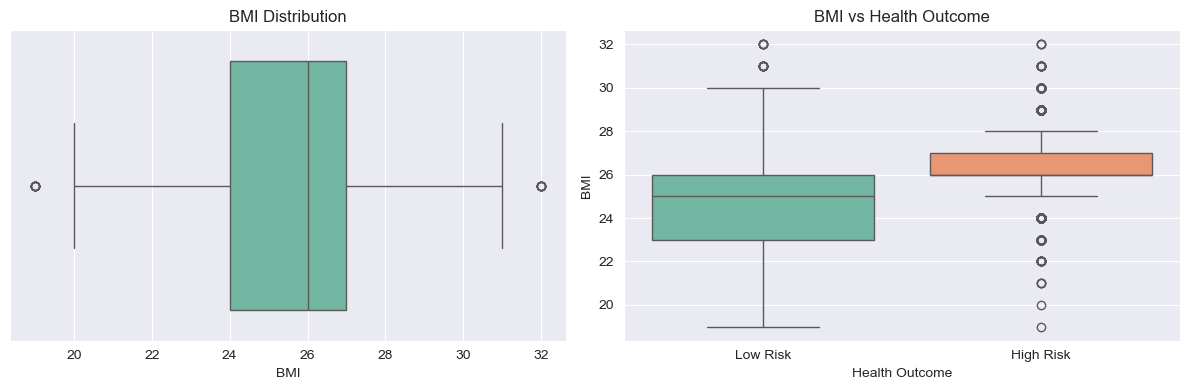

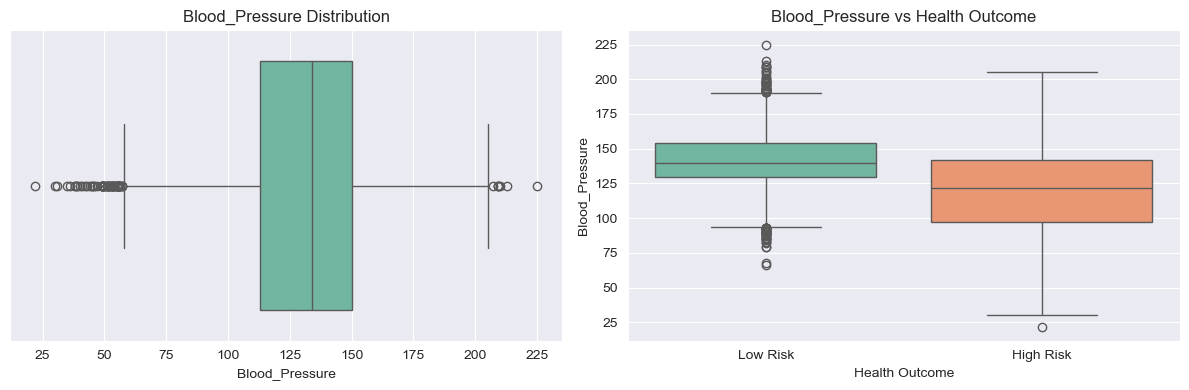

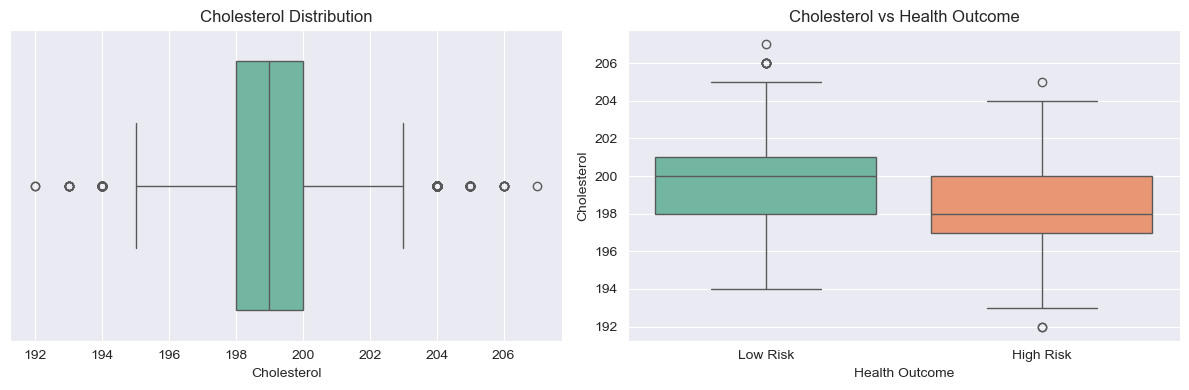

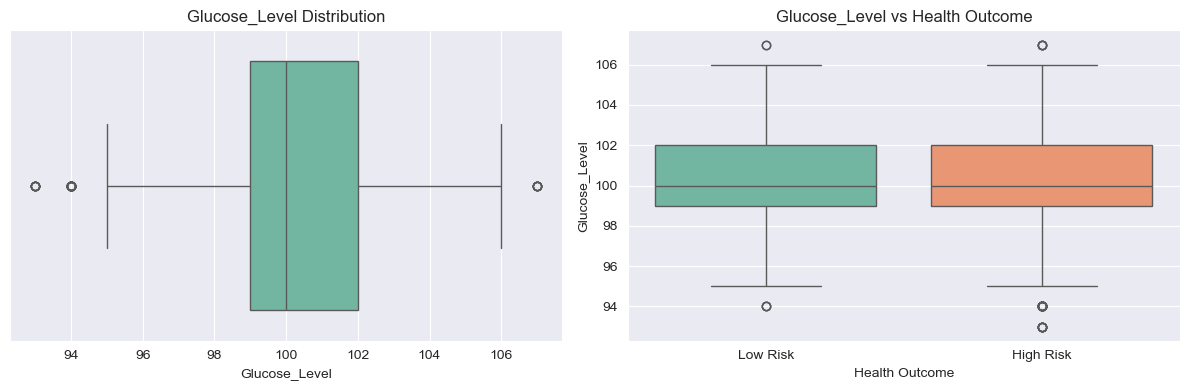

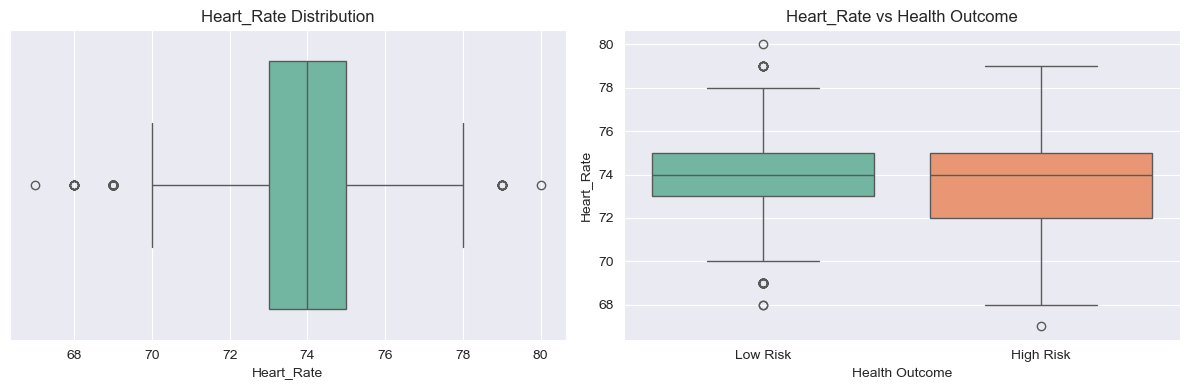

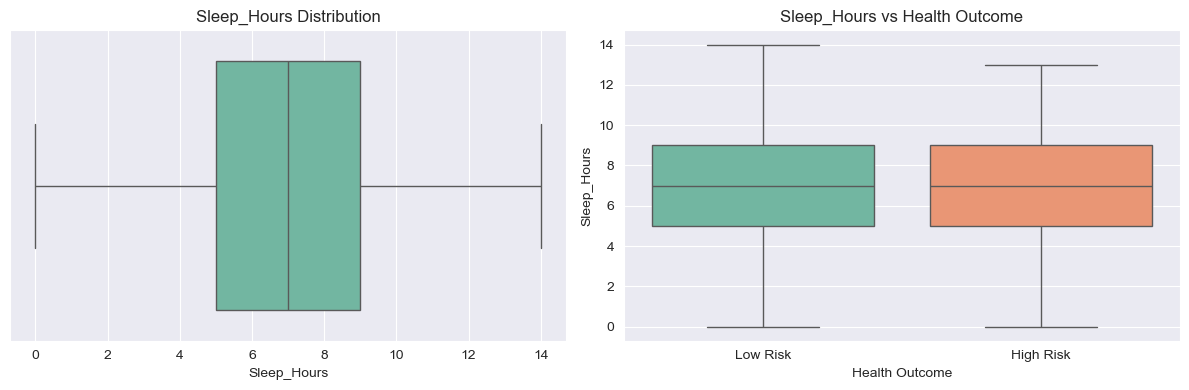

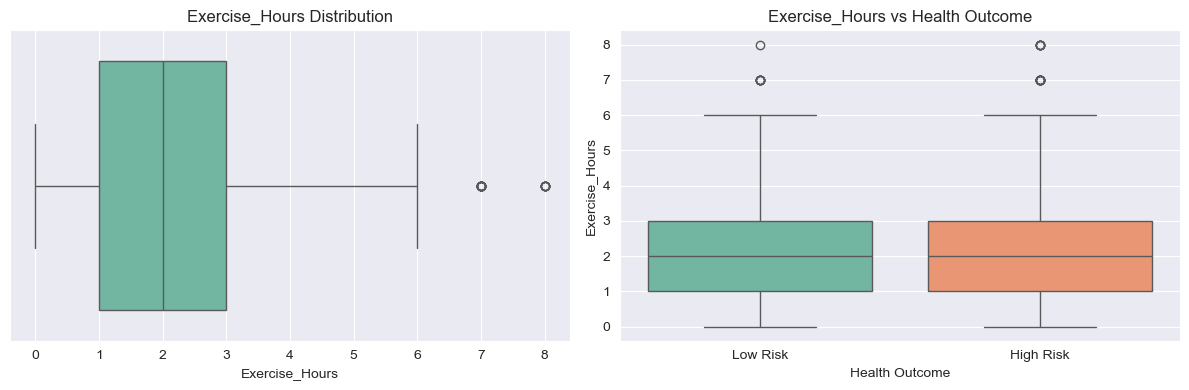

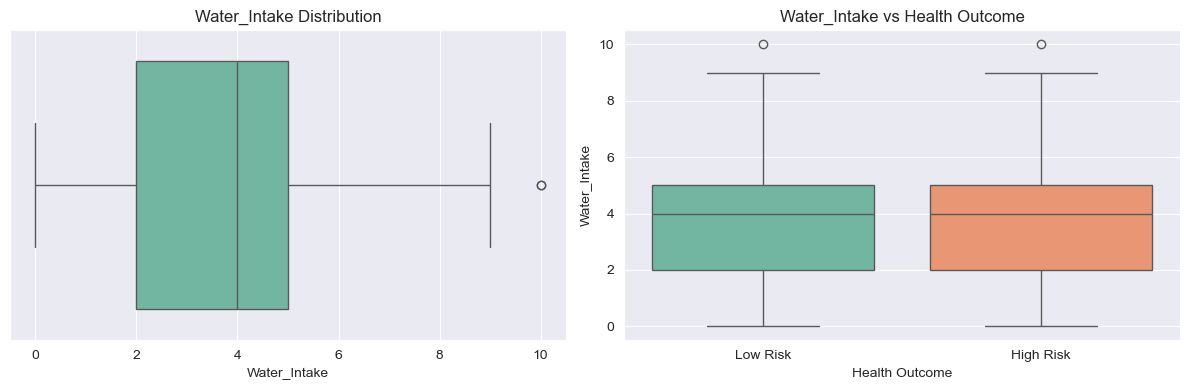

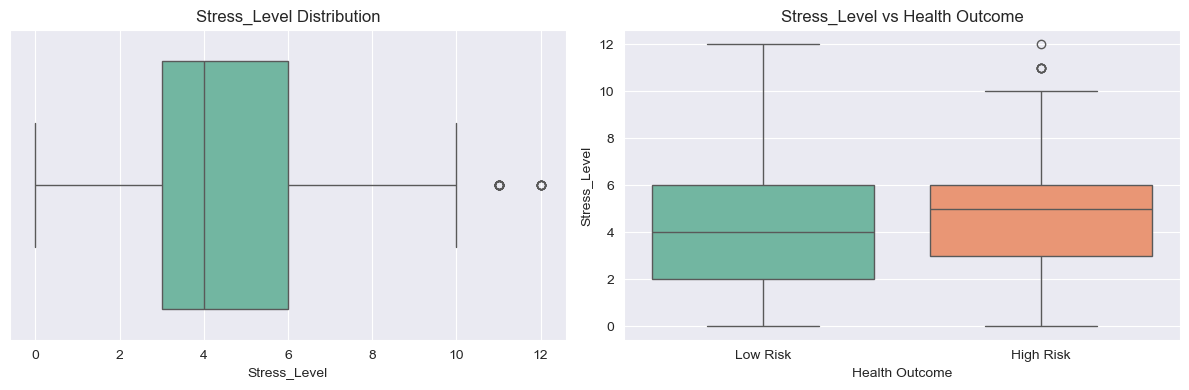

In [10]:
# Continuous Numeric Features Outliers Detection and Relation with Target
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    #  Distribution 
    sns.boxplot(data=data, x=col, ax=axes[0], color="#66C2A5")
    axes[0].set_title(f'{col} Distribution')
    axes[0].set_xlabel(col)

    # Relation with Target
    sns.boxplot(x='Target', y=col, data=data, ax=axes[1],  palette='Set2', hue='Target', legend=False)
    axes[1].set_title(f'{col} vs Health Outcome')
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(['Low Risk', 'High Risk'])
    axes[1].set_xlabel('Health Outcome')

    plt.tight_layout()
    plt.show()


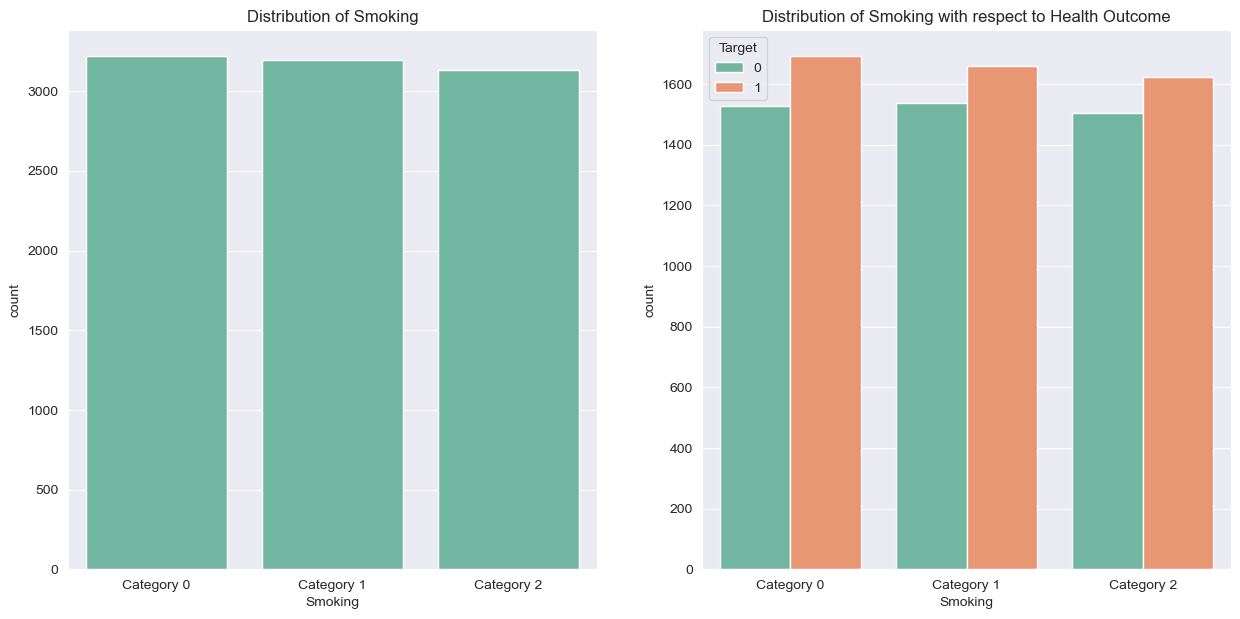

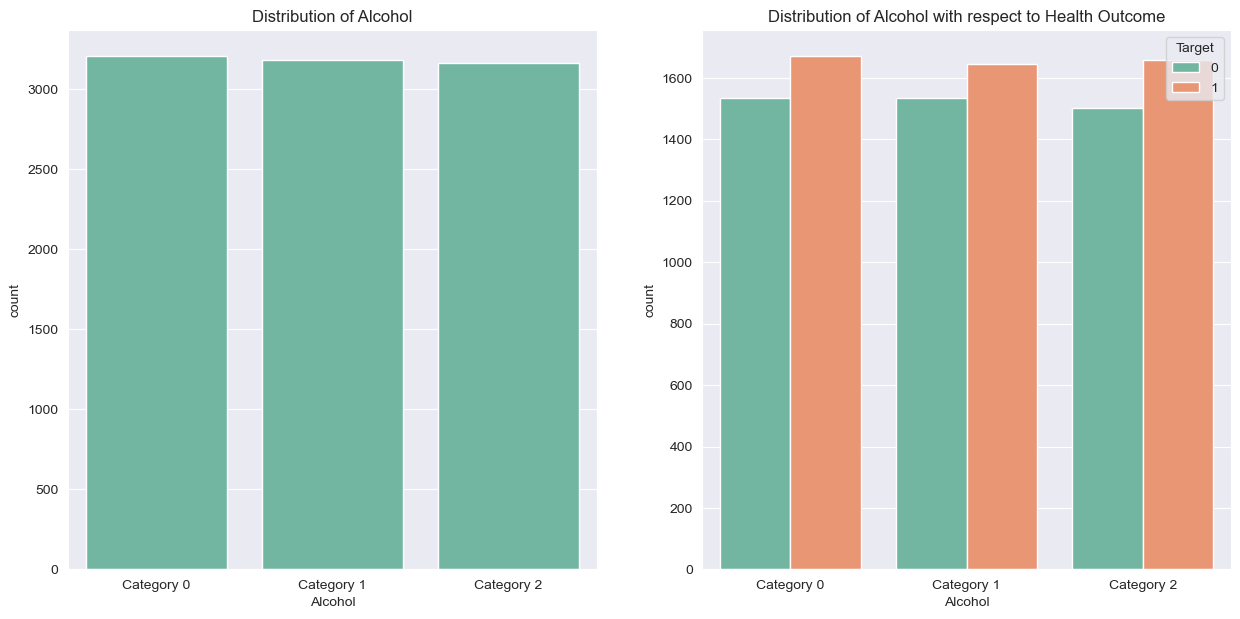

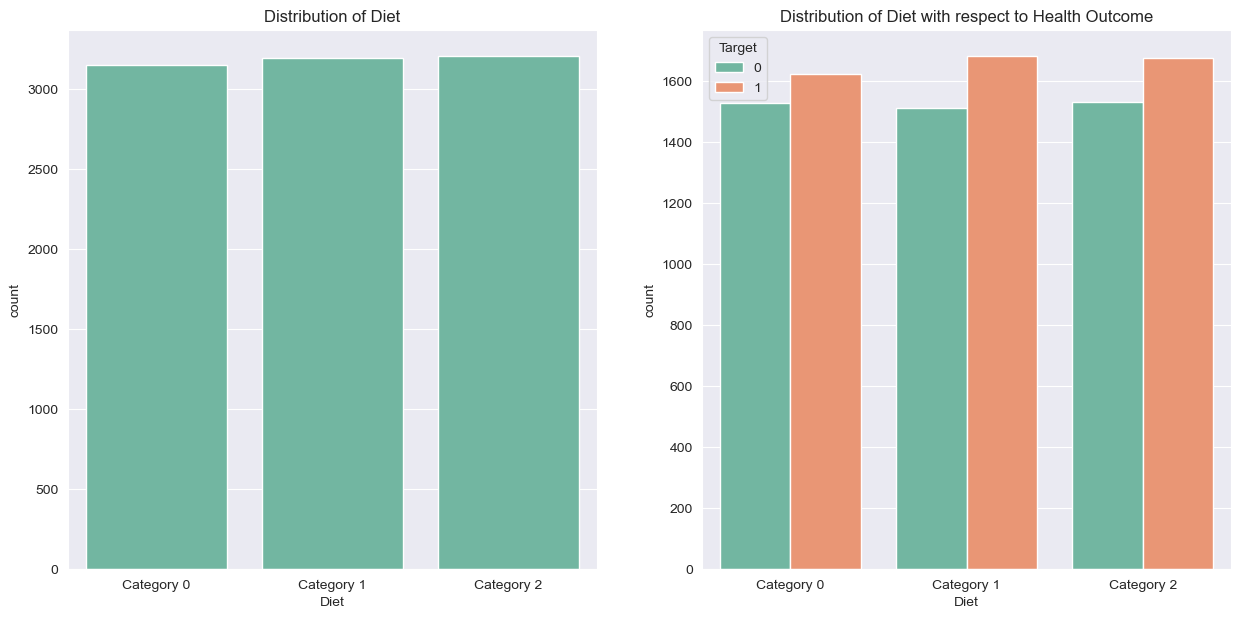

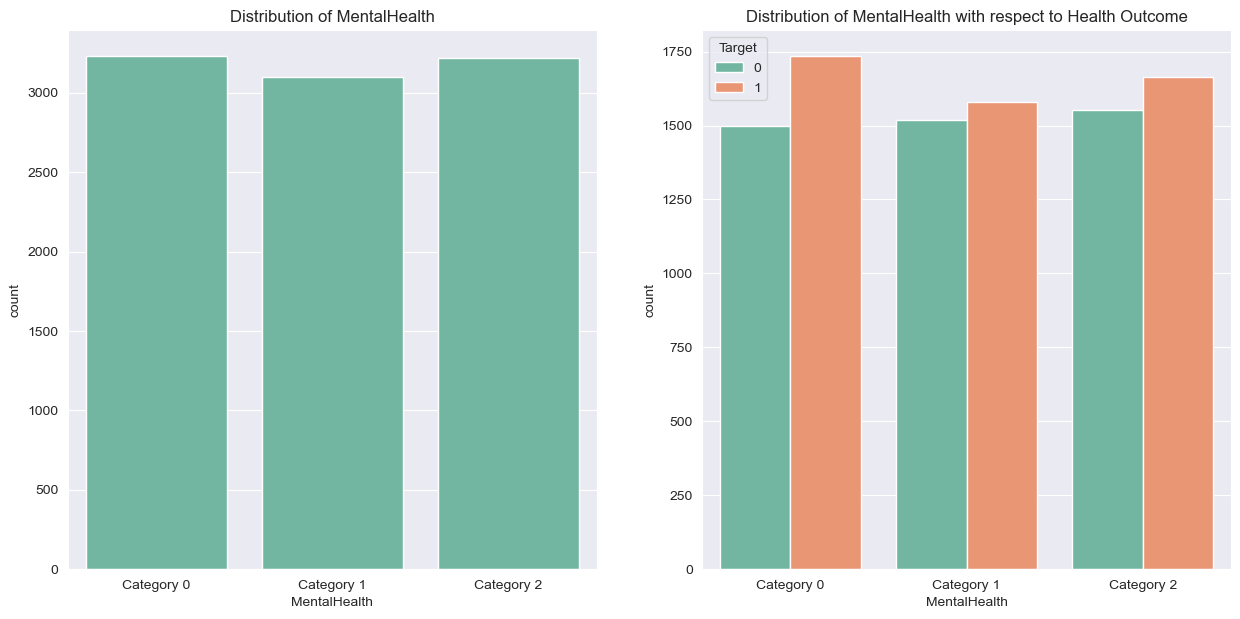

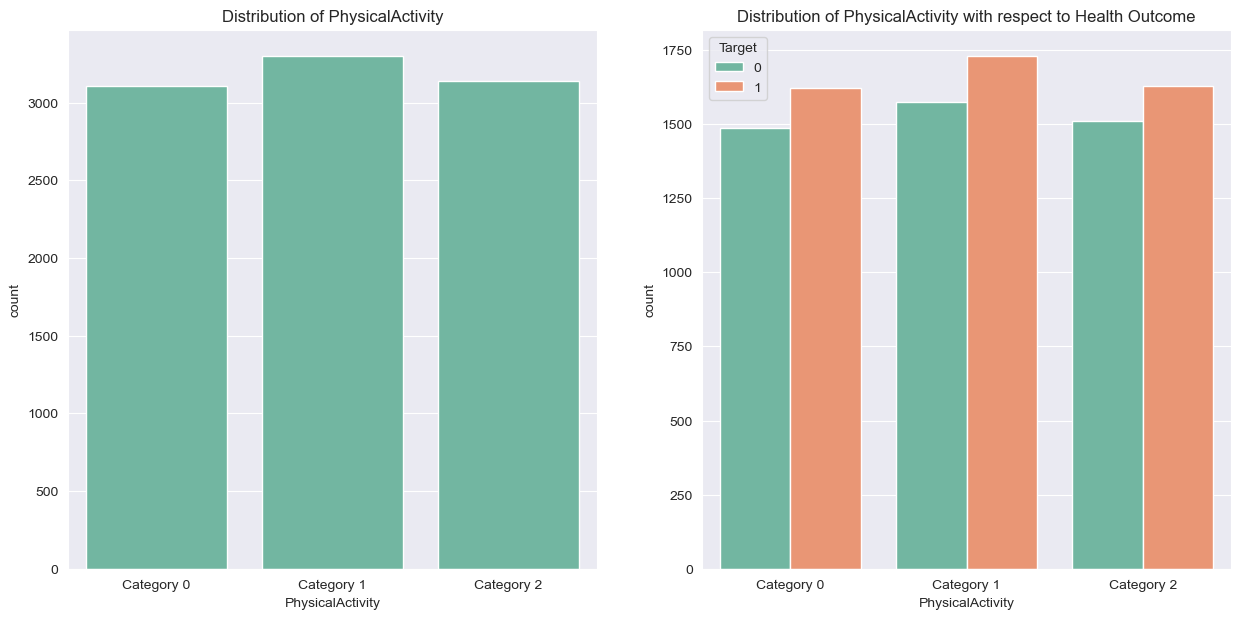

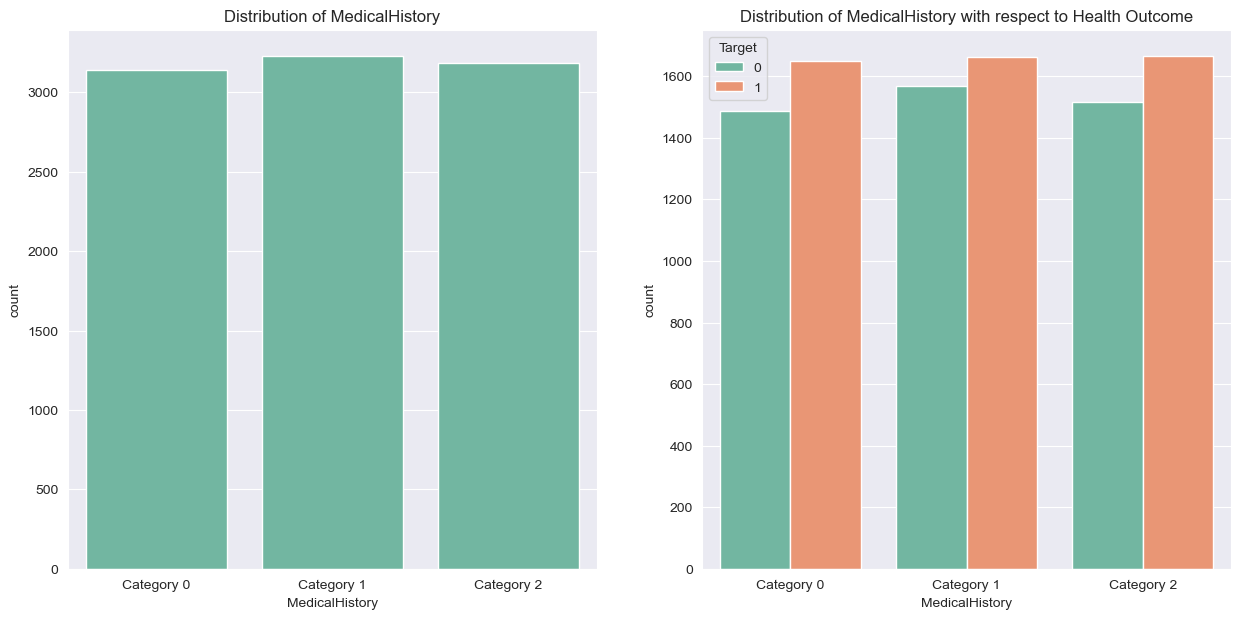

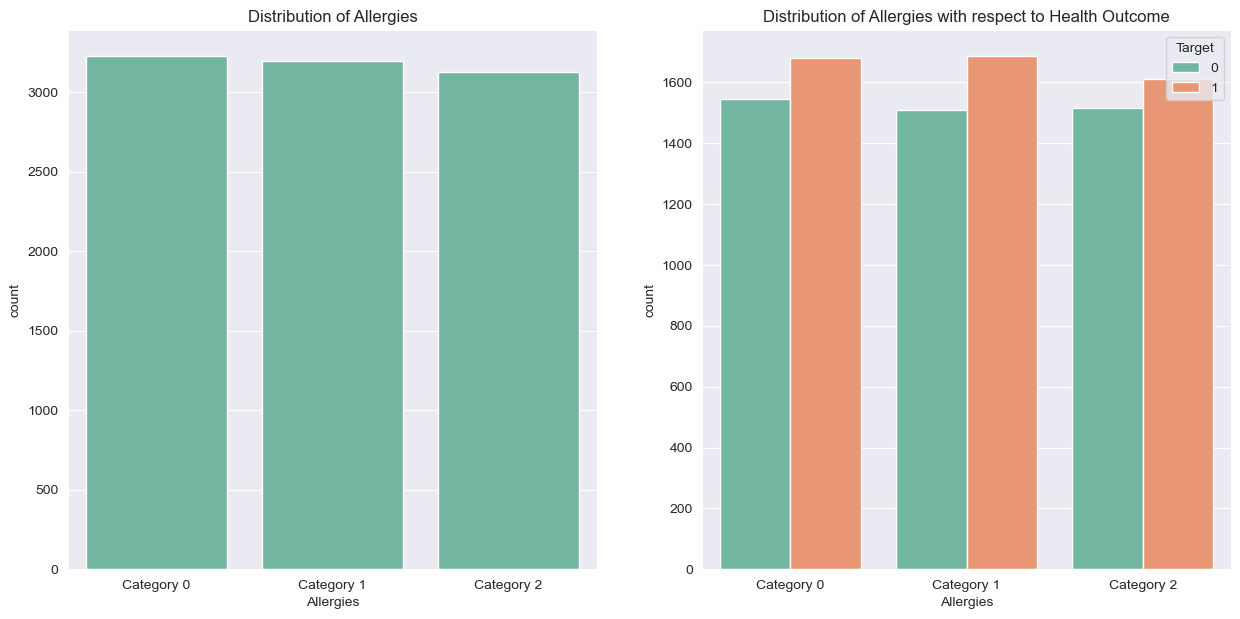

In [11]:
# Categorical Features Distribution and Relation with Target (Ternary)
cat_cols=['Smoking', 'Alcohol', 'Diet', 'MentalHealth', 'PhysicalActivity', 'MedicalHistory', 'Allergies']

for cols in cat_cols:
    plot_data = data.copy()
    plot_data[cols] = plot_data[cols].map({
        0: "Category 0",
        1: "Category 1",
        2: "Category 2"
    })
    order = ["Category 0", "Category 1", "Category 2"]
    plt.figure(figsize=(15,7))
    # Plot 1
    plt.subplot(1,2,1)
    sns.countplot(data= plot_data, x=cols, color='#66C2A5',order=order)
    plt.title(f"Distribution of {cols}")
    
    # Plot 2
    plt.subplot(1,2,2)
    sns.countplot(data= plot_data, x=cols, hue="Target", palette="Set2",order=order)
    plt.title(f"Distribution of {cols} with respect to Health Outcome")
    plt.show()


0 -> Low Risk, 1-> High Risk

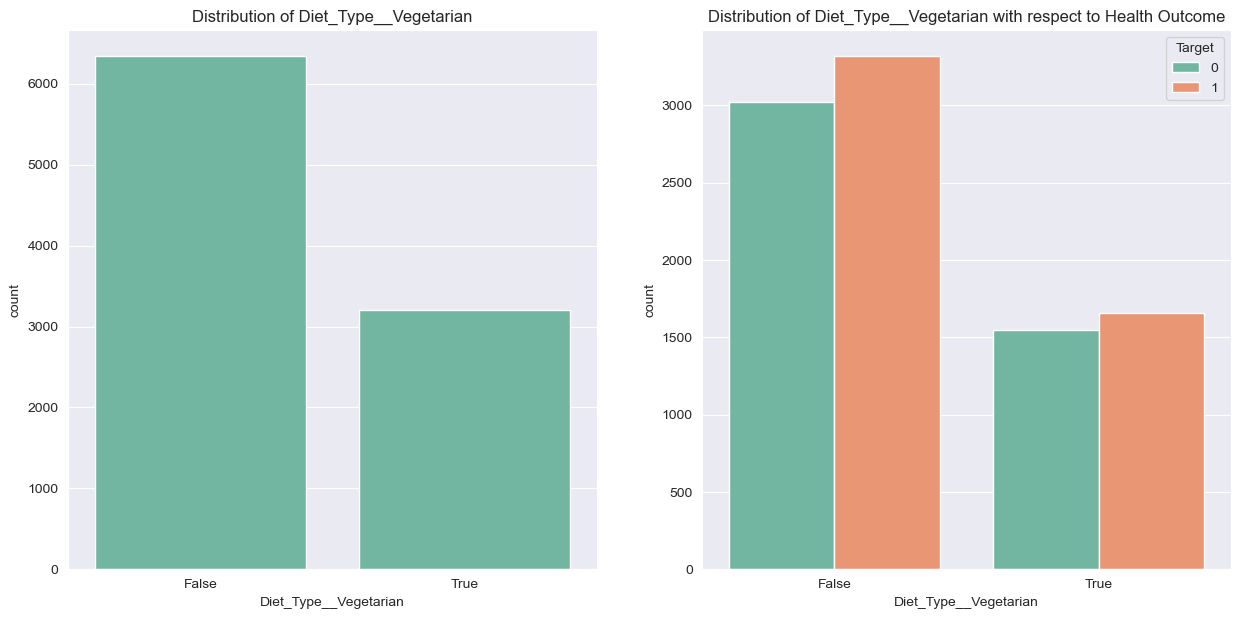

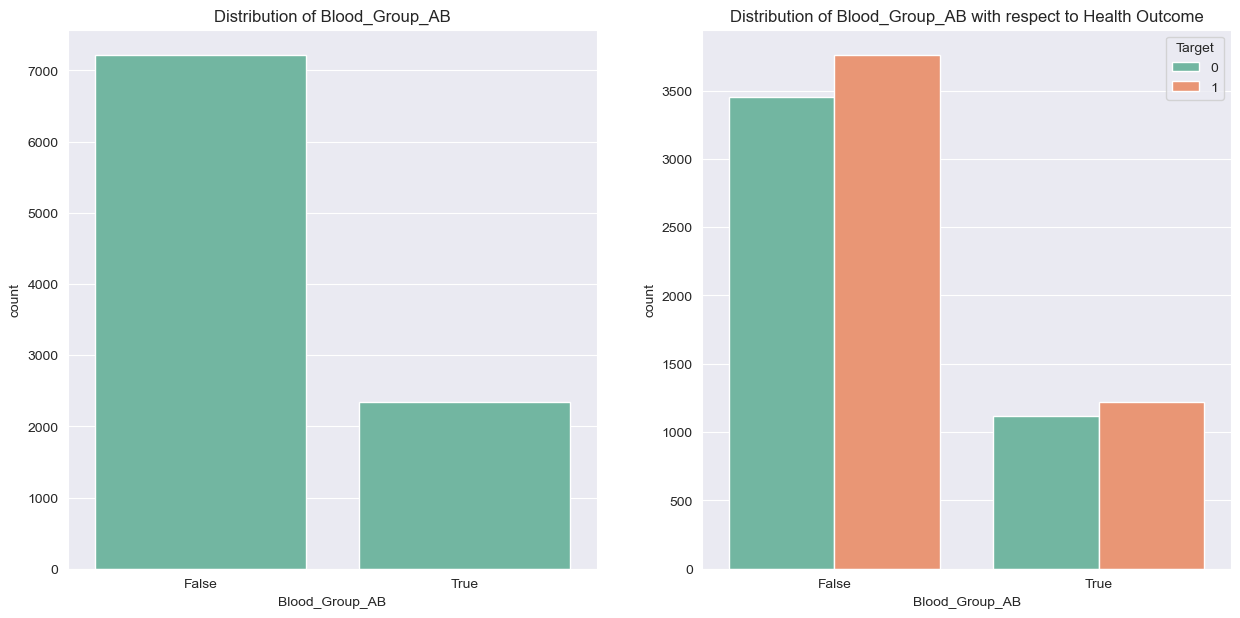

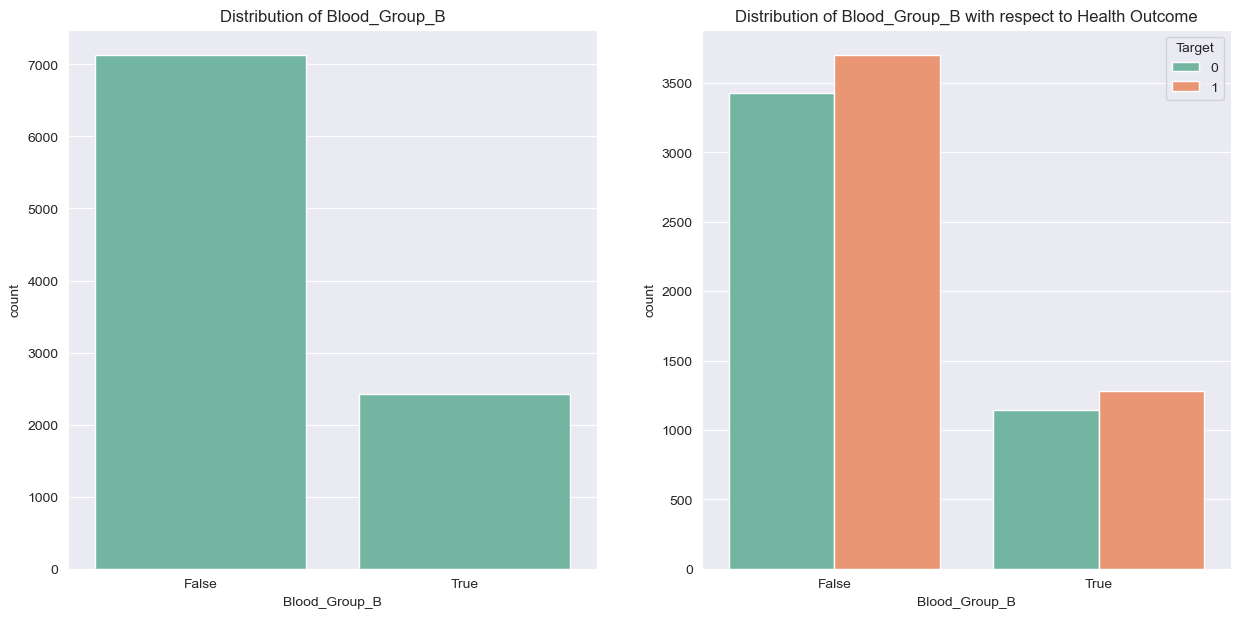

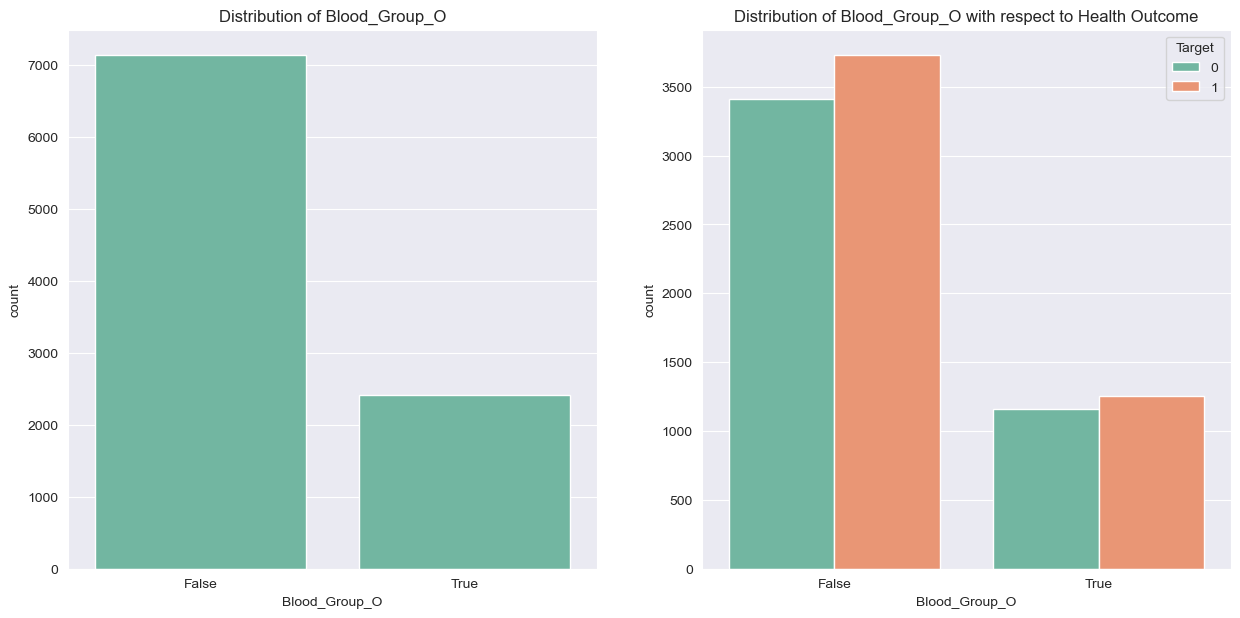

In [12]:
# Categorical Features Distribution And relation with Health Outcome (Binary)
cat_cols_binary = [
    'Diet_Type__Vegetarian','Blood_Group_AB','Blood_Group_B','Blood_Group_O']

for cols in cat_cols_binary:
    plot_data = data.copy()
   
    plot_data[cols] = (
        plot_data[cols].astype("Int64").map({
            0: "False",
            1: "True"
        })
    )
    order = ["False", "True"]

    plt.figure(figsize=(15,7))
    # Plot 1
    plt.subplot(1,2,1)
    sns.countplot(data=plot_data,x=cols, color="#66C2A5",order=order)
    plt.title(f"Distribution of {cols}")

    # Plot 2
    plt.subplot(1,2,2)
    sns.countplot(data=plot_data, x=cols, hue="Target", palette="Set2", order=order
    )
    plt.title(f"Distribution of {cols} with respect to Health Outcome")
    plt.show()

0 -> Low Risk, 1-> High Risk

In [13]:
# Summary statistics by Target
data.groupby("Target")[num_cols].mean()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level
Target,,,,,,,,,,
0,38.697593,24.821444,141.447921,199.758206,100.388184,73.729540,6.887746,1.880525,3.645952,4.122976
1,29.317734,26.431010,120.226351,198.479614,100.076521,73.507532,7.009841,1.903193,3.521189,4.620004


In [14]:
data[num_cols].skew()

Age               0.696060
BMI              -0.257185
Blood_Pressure   -0.431994
Cholesterol       0.239760
Glucose_Level    -0.122551
Heart_Rate       -0.019365
Sleep_Hours      -0.191586
Exercise_Hours    0.704528
Water_Intake      0.096273
Stress_Level      0.243161
dtype: float64

Skewness Check

In [15]:
# Multicollinearity Check
num_cols = [
    "Age", "BMI", "Blood_Pressure", "Cholesterol",
    "Glucose_Level", "Heart_Rate", "Sleep_Hours",
    "Exercise_Hours", "Water_Intake", "Stress_Level",
]

X = data[num_cols]
X = X.dropna()
from statsmodels.tools.tools import add_constant

X_const = add_constant(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

vif_data


,Feature,VIF
0,const,21259.686998
1,Age,1.446827
2,BMI,1.704005
3,Blood_Pressure,1.349934
4,Cholesterol,2.046183
5,Glucose_Level,3.406506
6,Heart_Rate,1.552851
7,Sleep_Hours,4.292026
8,Exercise_Hours,1.175465
9,Water_Intake,2.032481


EDA Conclusion : The dataset is clean with balanced health outcome classes and minimal missing values. Both numerical and categorical features show stable distributions and meaningful relationships with the target(Health Outcome). Also most numerical features exhibit minimal skewness and VIF analysis indicates no severe multicollinearity among features Overall, the data is well-suited for tree-based ensemble modeling.

# Data Preprocessing

In [17]:
cols = ["Diet_Type__Vegan", "Diet_Type__Vegetarian", "Blood_Group_AB", "Blood_Group_B", "Blood_Group_O"]
data[cols] = data[cols].astype(int)

In [18]:
from sklearn.model_selection import train_test_split
X = data.drop("Target", axis=1)
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size= 0.2, stratify = y)


# Baseline Model - Logistic Regression with Regularization

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, recall_score

In [22]:
pipe= Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(
        penalty='l2',
        solver="liblinear",
        max_iter=1000,
        random_state=42
    ))
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Evaluation of Baseline Logistic Regression Model")
print("Recall Score:", recall_score(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Evaluation of Baseline Logistic Regression Model
Recall Score: 0.8283132530120482
Accuracy Score: 0.8141361256544503
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       914
           1       0.82      0.83      0.82       996

    accuracy                           0.81      1910
   macro avg       0.81      0.81      0.81      1910
weighted avg       0.81      0.81      0.81      1910



# Model 1 - Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_base = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)

# Train model
rf_base.fit(X_train, y_train)

# Test Model
y_pred = rf_base.predict(X_test)

print("Evaluation of Random Forest Model")
print("Recall Score:", recall_score(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Evaluation of Random Forest Model
Recall Score: 0.964859437751004
Accuracy Score: 0.9413612565445026
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       914
           1       0.93      0.96      0.94       996

    accuracy                           0.94      1910
   macro avg       0.94      0.94      0.94      1910
weighted avg       0.94      0.94      0.94      1910



In [24]:
# HyperParameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(
        n_estimators=200,
        class_weight='balanced',
        random_state=42
    ),
    param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)

Best params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}


# Tuned Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42,
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=5
)

# Train model
rf.fit(X_train, y_train)

# Test Model
y_pred = rf.predict(X_test)


print("Evaluation of Tuned Random Forest Model")
print("Recall Score:", recall_score(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Evaluation of Tuned Random Forest Model
Recall Score: 0.9568273092369478
Accuracy Score: 0.9345549738219895
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       914
           1       0.92      0.96      0.94       996

    accuracy                           0.93      1910
   macro avg       0.94      0.93      0.93      1910
weighted avg       0.94      0.93      0.93      1910



“Hyperparameter tuning was performed to control model complexity and reduce overfitting. However, the tuned Random Forest showed a slight decrease in accuracy and recall compared to the baseline model. Since the baseline model demonstrated stronger generalization performance”

# Model 2 - Gradient Boosting (Ensemble Learning)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(
    n_estimators = 150,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Evaluation of Gradient Boosting Model")
print("Recall Score:", recall_score(y_test, y_pred_gb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Evaluation of Gradient Boosting Model
Recall Score: 0.9497991967871486
Accuracy Score: 0.9303664921465968
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       914
           1       0.92      0.95      0.93       996

    accuracy                           0.93      1910
   macro avg       0.93      0.93      0.93      1910
weighted avg       0.93      0.93      0.93      1910



ROC-AUC Score (Random Forest): 0.9842702319123321


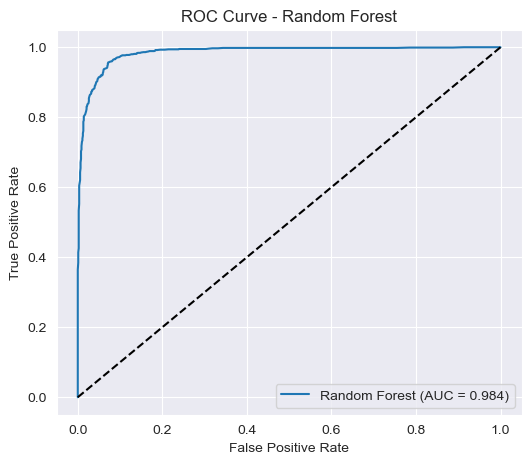

In [27]:
# Final Evaluation
from sklearn.metrics import roc_auc_score, roc_curve

# Probabilities for positive class
y_proba_rf = rf_base.predict_proba(X_test)[:, 1]

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba_rf)
print("ROC-AUC Score (Random Forest):", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


**The Random Forest model achieved a ROC-AUC score of 0.984, indicating excellent class separability. The steep ROC curve demonstrates that the model can achieve high true positive rates while maintaining low false positive rates, making it well-suited for health risk prediction tasks.**

# Result

| Model                              | Accuracy (%) | Recall  (%)   |
|------------------------------------|--------------|---------------|
| Logistic Regression (Baseline)     | 81.41        | 82.83         |
| Random Forest                      | **94.13**    | **96.48**     |
| Tuned Random Forest                | 93.45        | 95.68         |
| Gradient Boosting                  | 93.03        | 94.97         |


Recall Score is used as priority evaluation metrics (as missing a high risk patient is dangerous)
# Best Model -> Random Forest :
# Recall Score: 96.48
# Accuracy: 94.13
# ROC-AUC score: 0.984
**The Random Forest model was selected as the final classifier due to its superior recall and overall performance compared to other evaluated models.**
